In [ ]:
import os
import pickle
import numpy as np
import json
from myEstimator import gd_estimator, mymcmc_estimator2, ML_estimator
from scipy.stats import beta

folder = '/Users/anjiefang/Desktop/CIKM2017_select_best/'
INTERVALS = [30,60,120]
trainning_size = [0.5, 0.6, 0.8]
estimator_name = ['GDE', 'MLE', 'MCE']

fold_num = 5
partition_num = 1000
est_method = 'BFGS'

errors = [[[[] for e in estimator_name] for t in trainning_size ] for i in INTERVALS]

def rmse(data, dist, para):
    y_true, bins = np.histogram(data, bins=20, density=True)
    bins[0] = 0.0
    bins[-1] = 1.0
    est_a = np.array([(dist.cdf(bins[i + 1], para[0], para[1]) - dist.cdf(bins[i], para[0], para[1])) for i in range(len(bins) - 1)])
    step = np.array([(bins[i + 1] - bins[i]) for i in range(len(bins) - 1)])
    if np.sum(est_a) < 1e-5:
        return 2.0
    tru_a = y_true * step
    return np.sqrt(np.mean((est_a - tru_a)**2))

for i in range(len(INTERVALS)):
    print 'Time Interval: ' + str(INTERVALS[i])
    periods = np.array(pickle.load(open(folder + 'time_period_' + str(INTERVALS[i]) + '/periods.p')))
    for p in range(len(periods)):
        for t in range(len(trainning_size)):
            data_full = periods[p]
            data = np.array([tmp for tmp in data_full if tmp <= trainning_size[t]])
            
            gde = gd_estimator(data = data)
            gd_res = gde.estimate(fold_num=fold_num, partition_num=partition_num)
            err0 = rmse(data_full, beta, gd_res)
            
            mle = ML_estimator(data = data)
            ml_res = mle.estimate(fold_num = fold_num, partition_num = partition_num)
            err1 = rmse(data_full, beta, ml_res)
            
            mce = mymcmc_estimator2(data = data)
            mc_res = mce.estimate(fold_num * 5)
            err2 = rmse(data_full, beta, mc_res)
            
            errors[i][t] = [err0, err1, err2]
        print errors[i]

In [13]:
import os
import pickle
import numpy as np
import json
from myEstimator import gd_estimator, mymcmc_estimator2, ML_estimator
from scipy.stats import beta

res_col = 0
output_folder = '/Volumes/anjie/tr.anjie/CIKM2017/output'

INTERVALS = [30,60,120]
trainning_size = ['0.3', '0.5', '0.8']
estimator_name = ['BSE' ,'RNE' ,'GDE', 'MLE', 'MCE']
errors = {m:{i:{s:[] for s in trainning_size} for i in INTERVALS} for m in estimator_name}
for f in os.listdir(output_folder):
    if 'txt' not in f: continue
    method, interval, size, index = f.split('.txt')[0].split('_')
    index = int(index)
    interval = int(interval)
    res = float(open(output_folder + '/' + f).readline().split(',')[res_col])
    if np.isnan(res): continue
    errors[method][interval][size].append(res)
    
mini_sample = min([len(errors[m][i][s]) for m in estimator_name for i in INTERVALS for s in trainning_size])
maxi_sample = max([len(errors[m][i][s]) for m in estimator_name for i in INTERVALS for s in trainning_size])
print mini_sample, maxi_sample
   

194 200


In [14]:
for size in trainning_size:
    print '**************'
    for m in estimator_name:
        for interval in INTERVALS:
            data = np.array(errors[m][interval][size])
            print 'Size: ' + size + ', Method: ' + m + ', Interval: ' + str(interval) + ', Error: ' + str(np.mean(data))

**************
Size: 0.3, Method: BSE, Interval: 30, Error: 0.336307565833
Size: 0.3, Method: BSE, Interval: 60, Error: 0.312735584127
Size: 0.3, Method: BSE, Interval: 120, Error: 0.332067977202
Size: 0.3, Method: RNE, Interval: 30, Error: 0.336557033998
Size: 0.3, Method: RNE, Interval: 60, Error: 0.31279913991
Size: 0.3, Method: RNE, Interval: 120, Error: 0.32796082776
Size: 0.3, Method: GDE, Interval: 30, Error: 1.01791843763
Size: 0.3, Method: GDE, Interval: 60, Error: 0.973264271059
Size: 0.3, Method: GDE, Interval: 120, Error: 0.955396220903
Size: 0.3, Method: MLE, Interval: 30, Error: 1.04083744785
Size: 0.3, Method: MLE, Interval: 60, Error: 0.994069744178
Size: 0.3, Method: MLE, Interval: 120, Error: 0.978299056298
Size: 0.3, Method: MCE, Interval: 30, Error: 0.495084162236
Size: 0.3, Method: MCE, Interval: 60, Error: 0.507342471681
Size: 0.3, Method: MCE, Interval: 120, Error: 0.531053627138
**************
Size: 0.5, Method: BSE, Interval: 30, Error: 0.23749308528
Size: 0.5,

BETA
(0.31947969346919047, 0.026965585498935282, 0.1490665135696411)
(0.18146680124454778, 0.012766393558209453, 0.053623306226108988)
(0.069369896793213953, 0.012493467109185438, 0.019634056757020617)
******BSE1*****
(1.0518603655907099, 0.074165872847171507, 3.7871027544639717)
(0.71884080499637748, 0.044858758102947954, 1.954764360445236)
(0.34659902203398618, 0.051494377921421121, 1.6952213827832814)
******BSE2*****
(0.33773864537566195, 0.025046566504726024, 0.15420448401943226)
(0.55047296748724828, 0.034655519182357021, 0.5228088978981118)
(0.24259327190719718, 0.033937885031691539, 0.14466694911668987)
******GDE*****
(0.59344045987655503, 0.051906551535292805, 0.84604349807097912)
(0.39673400788885077, 0.029319788370119095, 0.39404771176492048)
(0.18335391040998775, 0.039687283952920677, 0.31714127595533959)
******MLE*****
(0.52847749583514991, 0.049317754367906856, 0.67998962332715951)
(0.34400061828912387, 0.026948438751272907, 0.29941739253136213)
(0.15453209546868177, 0.037

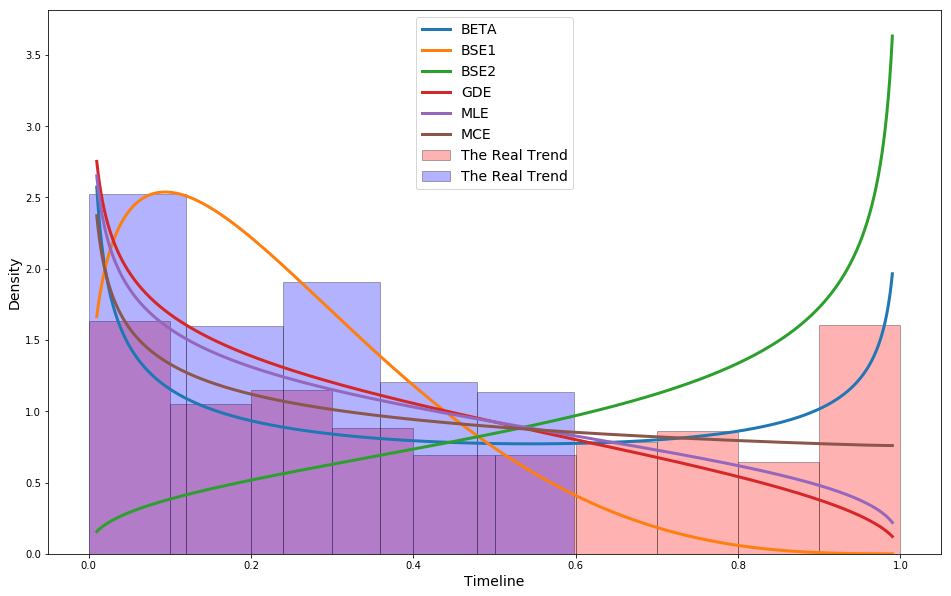

In [10]:
# Creaat figure for methods
import pickle
import numpy as np
from myEstimator import gd_estimator, mymcmc_estimator2, ML_estimator, randomE1, randomE2
from scipy.stats import beta 
import matplotlib.pyplot as plt

fold_num = 50
partition_num = 1000
file_folder = '/Users/anjiefang/Desktop/CIKM2017_select_best/'

interval = 600
tsize = 0.6
index = 4

# Metrics
def KL(p,q):
    return np.sum(p*np.log(p/(q + 1e-10)+1e-10)) + np.sum(q*np.log(q/(p + 1e-10)+1e-10))
def rmse(data, dist, para, thre = 0.5):
    y_true, bins = np.histogram(data, bins=20, density=True)
    bins[0] = 0.0
    bins[-1] = 1.0
    est_a = np.array([(dist.cdf(bins[i + 1], para[0], para[1]) - dist.cdf(bins[i], para[0], para[1])) for i in range(len(bins) - 1)])
    step = np.array([(bins[i + 1] - bins[i]) for i in range(len(bins) - 1)])
    if np.sum(est_a) < 1e-5:
        return 2.0
    indices = [i for i in range(len(bins)) if bins[i] >= thre]
    indices = indices[:-1]
    tru_a = y_true[indices] * step[indices]
    abe = np.sum(np.abs(est_a[indices] - tru_a))
    rmse = np.sqrt(np.mean((est_a[indices] - tru_a)**2))
    kle = KL(est_a[indices], tru_a)
    return abe, rmse, kle
def rmse2(data, dist, para, thre = 0.5):
    data1 = [ d for d in data if d > thre]
    y_true, bins = np.histogram(data1, bins=20, density=True)
    bins[0] = thre
    bins[-1] = 1.0
    est_a = np.array([(dist.cdf(bins[i + 1], para[0], para[1]) - dist.cdf(bins[i], para[0], para[1])) for i in range(len(bins) - 1)])
    step = np.array([(bins[i + 1] - bins[i]) for i in range(len(bins) - 1)])
    if np.sum(est_a) < 1e-5:
        return 2.0
    est_a /= (dist.cdf(1, para[0], para[1]) - dist.cdf(thre, para[0], para[1]))
    tru_a = y_true * step
    abe = np.sum(np.abs(est_a - tru_a))
    rmse = np.sqrt(np.mean((est_a - tru_a)**2))
    kle = KL(est_a, tru_a)
    return abe, rmse, kle

periods = np.array(pickle.load(open(file_folder + 'time_period_' + str(interval) + '/periods.p')))
data_full = periods[index]
data = np.array([tmp for tmp in data_full if tmp <= tsize])

plt.figure(figsize=(16,10))
plt.hist(data_full, bins=10, normed=True, histtype='bar', 
                         color='red', edgecolor='black', label='The Real Trend', fill=True, alpha=0.3)
plt.hist(data, bins=5, normed=True, histtype='bar', 
                         color='blue', edgecolor='black', label='The Real Trend', fill=True, alpha=0.3)
x = np.linspace(0.01, 0.99, 100000)

# real beta
print 'BETA'
mu = np.mean(data_full)
var = np.var(data_full)
a = mu*((mu*(1-mu))/var-1)
b = (1-mu)*((mu*(1-mu))/var-1) 
plt.plot(x, beta.pdf(x, a, b), lw=3, label='BETA')
err1 = rmse2(data_full, beta, (a,b), tsize)
err2 = rmse2(data_full, beta, (a,b), 0.0)
err3 = rmse(data_full, beta, (a,b), tsize)
print err1
print err2
print err3

# BSE1
print '******BSE1*****'
bse = randomE1(data=data)
bs_res = bse.estimate()
err1 = rmse2(data_full, beta, bs_res, tsize)
err2 = rmse2(data_full, beta, bs_res, 0.0)
err3 = rmse(data_full, beta, bs_res, tsize)
plt.plot(x, beta.pdf(x, bs_res[0], bs_res[1]), lw=3, label='BSE1')
print err1
print err2
print err3

# BSE2
print '******BSE2*****'
bse = randomE2(data=data, timeInterval=interval)
bs_res = bse.estimate()
err1 = rmse2(data_full, beta, bs_res, tsize)
err2 = rmse2(data_full, beta, bs_res, 0.0)
err3 = rmse(data_full, beta, bs_res, tsize)
plt.plot(x, beta.pdf(x, bs_res[0], bs_res[1]), lw=3, label='BSE2')
print err1
print err2
print err3

# GDE
print '******GDE*****'
gde = gd_estimator(data=data)
gd_res = gde.estimate(fold_num=fold_num, partition_num=partition_num)
err1 = rmse2(data_full, beta, gd_res, tsize)
err2 = rmse2(data_full, beta, gd_res, 0.0)
err3 = rmse(data_full, beta, gd_res, tsize)
plt.plot(x, beta.pdf(x, gd_res[0], gd_res[1]), lw=3, label='GDE')
print err1
print err2
print err3

# MLE
print '******MLE*****'
mle = ML_estimator(data=data)
ml_res = mle.estimate(fold_num=fold_num, partition_num=partition_num)
err1 = rmse2(data_full, beta, ml_res, tsize)
err2 = rmse2(data_full, beta, ml_res, 0.0)
err3 = rmse(data_full, beta, ml_res, tsize)
plt.plot(x, beta.pdf(x, ml_res[0], ml_res[1]), lw=3, label='MLE')
print err1
print err2
print err3

# MCE
print '******MCE*****'
mce = mymcmc_estimator2(data=data)
mc_res = mce.estimate(fold_num, mu_std=2)
err1 = rmse2(data_full, beta, mc_res, tsize)
err2 = rmse2(data_full, beta, mc_res, 0.0)
err3 = rmse(data_full, beta, mc_res, tsize)
plt.plot(x, beta.pdf(x, mc_res[0], mc_res[1]), lw=3, label='MCE')
print err1
print err2
print err3



plt.xlabel('Timeline', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=14)
plt.show()
